In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc

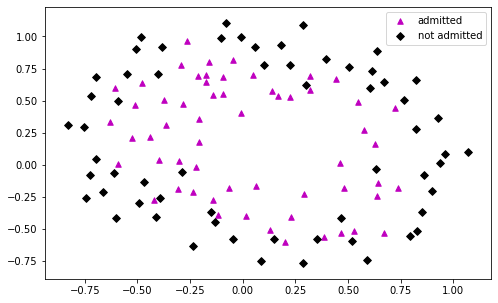

In [397]:
data=pd.read_csv('ex2data2.txt',names=['score1','score2','admission'])
pos=data[data['admission']==1]
neg=data[data['admission']==0]
fig,axs=plt.subplots(figsize=(8,5))
axs.scatter(pos['score1'],pos['score2'],marker='^',s=30,c='m',label='admitted')
axs.scatter(neg['score1'],neg['score2'],marker='D',s=30,c='k',label='not admitted')
plt.legend()
plt.show()
data.insert(3,'ones',1)


In [398]:
X1=data['score1']
X2=data['score2']
degree=5
for i in range(1,degree):
    for j in range(i):
        data['F'+str(i)+str(j)]=np.power(X1,i-j)*np.power(X2,j)
data.drop('score1',axis=1,inplace=True)
data.drop('score2',axis=1,inplace=True)

In [399]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [400]:
features=np.zeros(11)
X=data.iloc[:,1:]
y=data.iloc[:,:1]
X=np.array(X)
y=np.array(y)
lamda=9
alpha=9
print(X.shape,features.T.shape,y.shape)

(118, 11) (11,) (118, 1)


In [401]:
def cal_cost(X,y,features,lamda):
    X=np.matrix(X)
    y=np.matrix(y)
    features=np.matrix(features)
    m=len(X)
    first=np.multiply(-y,np.log(sigmoid(X*features.T)))
    second=np.multiply(y-1,np.log(1-sigmoid(X*features.T)))
    extra=(lamda/(2*m))*np.sum(np.power(features[:,1:],2))
    return (np.sum(first+second)/m)

In [402]:
cost=cal_cost(X,y,features,lamda)
cost

0.6931471805599454

In [403]:
def gradient_descent(X,y,features,alpha,iters):
    X=np.matrix(X)
    y=np.matrix(y)
    features=np.matrix(features)
    temp=np.matrix(np.zeros(features.shape))
    para=features.ravel().shape[1]
    cost=np.zeros(iters)        
    for i in range(iters):
        error=sigmoid(X*features.T)-y
        for j in range(para):
            temp1=np.multiply(error,X[:,j])
            temp[0,j]=features[0,j]-(alpha/len(X))*np.sum(temp1)
        features=temp
        cost[i]=cal_cost(X,y,features,lamda)
    return features,cost
        
        

In [404]:

iters=15000
final_features,final_cost=gradient_descent(X,y,features,alpha,iters)
final_features

matrix([[  0.38018203,  -2.79337351,  17.86678188,  -4.92336218,
          16.62779529,  18.52619485,   7.48260625, -41.15201586,
         -14.63614843, -47.42235269,  -1.13635981]])

0.43473559236810777


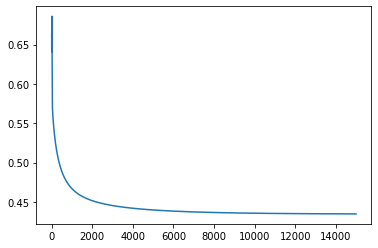

In [405]:
a=np.arange(iters)
print(final_cost[-1])
plt.plot(a,final_cost)
plt.show()

In [408]:
def predicted(X,features):
    h=sigmoid(X*features.T)
    return [1 if temp>=0.5 else 0 for temp in h]


y_predicted=predicted(X,final_features)
corr=[1 if (p==1 and q==1) or (p==0 and q==0) else 0 for (p,q) in zip(y_predicted,y)]
accuracy=sum(map(int,corr))%len(corr)
print(accuracy)

91
